
"""

Filters the raw base for creating a cleaner "Dataset_base"


"""


# Import the code 


In [2]:

#fileloc_old  = '/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one/code/Users/karan.bhatti'
fileloc  = '/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti/Dataprep'

import sys
print(sys.path)
print()
#sys.path.append(f'{fileloc}')
print()
#print(sys.path)


['/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti/Code', '/anaconda/envs/azureml_py38/lib/python38.zip', '/anaconda/envs/azureml_py38/lib/python3.8', '/anaconda/envs/azureml_py38/lib/python3.8/lib-dynload', '', '/anaconda/envs/azureml_py38/lib/python3.8/site-packages', '/anaconda/envs/azureml_py38/lib/python3.8/site-packages/azureml/_project/vendor', '/anaconda/envs/azureml_py38/lib/python3.8/site-packages/azureml/automl/core/_vendor']




In [3]:

class Data(object):
    pass

df = Data
summ = Data


In [4]:
import helpdesk as hd

In [5]:

import pandas as pd, numpy as np
from datetime import datetime


In [6]:
DEBUG = False

In [7]:

pd.set_option('display.max_rows', 50);
pd.set_option('display.max_columns', 50);
pd.set_option('display.width', 200);


In [8]:

#df.ft_raw = pd.read_csv(f'{fileloc}/raw_base_2023-02-09.csv', parse_dates = True)
df.ft_raw = pd.read_csv(f'{fileloc}/raw_base_2023-06-05.csv', parse_dates = True)

print(df.ft_raw.shape)
print(df.ft_raw.columns.values.tolist())

#raw_base_2022-12-03 # 588K
#raw_base_2022-12-15 # 588K

#raw_base_2023-02-09 # 641K
#raw_base_2023-06-05 # 725K


(725080, 33)
['@id_DOG', 'Place', 'DogName', 'Box', 'Rug', 'Weight', 'StartPrice', 'Handicap', 'Margin1', 'Margin2', 'PIR', 'Checks', 'Comments', 'SplitMargin', 'y_runtime', 'Prizemoney', 'RaceId', 'TrainerId', 'TrainerName', '@id_RACE', 'RaceNum', 'RaceName', 'RaceTime', 'Distance', 'RaceGrade', 'Track', 'date', 'Event_Dt', 'ft_sp', 'x_num_dogs', 'position', 'y_margin', 'y_pos']


In [9]:

print(df.ft_raw.columns.values.tolist())


['@id_DOG', 'Place', 'DogName', 'Box', 'Rug', 'Weight', 'StartPrice', 'Handicap', 'Margin1', 'Margin2', 'PIR', 'Checks', 'Comments', 'SplitMargin', 'y_runtime', 'Prizemoney', 'RaceId', 'TrainerId', 'TrainerName', '@id_RACE', 'RaceNum', 'RaceName', 'RaceTime', 'Distance', 'RaceGrade', 'Track', 'date', 'Event_Dt', 'ft_sp', 'x_num_dogs', 'position', 'y_margin', 'y_pos']


In [10]:

# Find the Places to be removed
print( pd.DataFrame(df.ft_raw['Place'].value_counts()).transpose() )


            1      2      5      3      4      6      7      8   3=   4=   2=   5=   1=   6=   7=
Place  100232  99968  99909  99860  99840  93484  75810  52964  591  568  524  455  380  339  156


In [11]:

print( pd.DataFrame(df.ft_raw['position'].value_counts()).transpose() )


               1       2       3       4       5      6      7      8
position  100612  100492  100451  100408  100364  93823  75966  52964


In [12]:

df_base = df.ft_raw.copy()


In [13]:

df_base.sort_values(by = ['@id_DOG', 'DogName', 'Event_Dt'], inplace = True)


In [14]:

#df_base0[df_base0.DogName.isin(['FOURTH DIMENTION'])].head()
df_base[df_base['@id_RACE'].isin([631783547]) ]


,@id_DOG,Place,DogName,Box,Rug,Weight,StartPrice,Handicap,Margin1,Margin2,PIR,Checks,Comments,SplitMargin,y_runtime,Prizemoney,RaceId,TrainerId,TrainerName,@id_RACE,RaceNum,RaceName,RaceTime,Distance,RaceGrade,Track,date,Event_Dt,ft_sp,x_num_dogs,position,y_margin,y_pos
70,114244064,2,FOURTH DIMENTION,3.0,3,33.4,$4.20,NaN,0.39,0.39,M/22,1,NaN,8.36,22.75,NaN,631783547,131578,P Pollutro,631783547,7,TAB - LONG MAY WE PLAY,05:15PM,400m,Grade 5 T3,Warragul,14 Jan 21,2021-01-14,4.2,8,2,0.39,2
2040,157829531,3,TUI,4.0,4,29.3,$8.50,NaN,3.60,3.21,M/43,4,NaN,8.47,22.97,NaN,631783547,110965,C Haigh,631783547,7,TAB - LONG MAY WE PLAY,05:15PM,400m,Grade 5 T3,Warragul,14 Jan 21,2021-01-14,8.5,8,3,3.60,3
2319,164415675,6,BIG PLANS,2.0,2,39.7,$9.10,NaN,8.80,1.21,M/68,0,NaN,8.62,23.34,NaN,631783547,255489,K Thorburn,631783547,7,TAB - LONG MAY WE PLAY,05:15PM,400m,Grade 5 T3,Warragul,14 Jan 21,2021-01-14,9.1,8,6,8.80,6
3170,184236240,5,CEE JAY ACE,1.0,1,33.0,$2.80F,NaN,7.59,2.23,S/86,1,NaN,8.73,23.25,NaN,631783547,283109,L Dalziel,631783547,7,TAB - LONG MAY WE PLAY,05:15PM,400m,Grade 5 T3,Warragul,14 Jan 21,2021-01-14,2.8,8,5,7.59,5
3443,190918076,4,BANJO PLATO,8.0,8,33.1,$14.10,NaN,5.36,1.76,S/75,0,NaN,8.64,23.10,NaN,631783547,65076,D Belsham,631783547,7,TAB - LONG MAY WE PLAY,05:15PM,400m,Grade 5 T3,Warragul,14 Jan 21,2021-01-14,14.1,8,4,5.36,4
8508,224008138,7,HEIDI INTENTION,7.0,7,25.7,$6.20,NaN,14.94,6.14,M/57,11,NaN,8.48,23.77,NaN,631783547,27599,J Caley,631783547,7,TAB - LONG MAY WE PLAY,05:15PM,400m,Grade 5 T3,Warragul,14 Jan 21,2021-01-14,6.2,8,7,14.94,7
47872,314053857,1,PARUMBA BARCIA,6.0,6,30.2,$14.50,NaN,0.39,NaN,M/11,1,NaN,8.29,22.72,NaN,631783547,132501,E Lieshout,631783547,7,TAB - LONG MAY WE PLAY,05:15PM,400m,Grade 5 T3,Warragul,14 Jan 21,2021-01-14,14.5,8,1,0.39,1
88992,340020191,8,HURRICANE PETE,5.0,5,32.7,$18.10,NaN,16.19,1.24,M/34,15,NaN,8.43,23.85,NaN,631783547,69852,J Sultana,631783547,7,TAB - LONG MAY WE PLAY,05:15PM,400m,Grade 5 T3,Warragul,14 Jan 21,2021-01-14,18.1,8,8,16.19,8


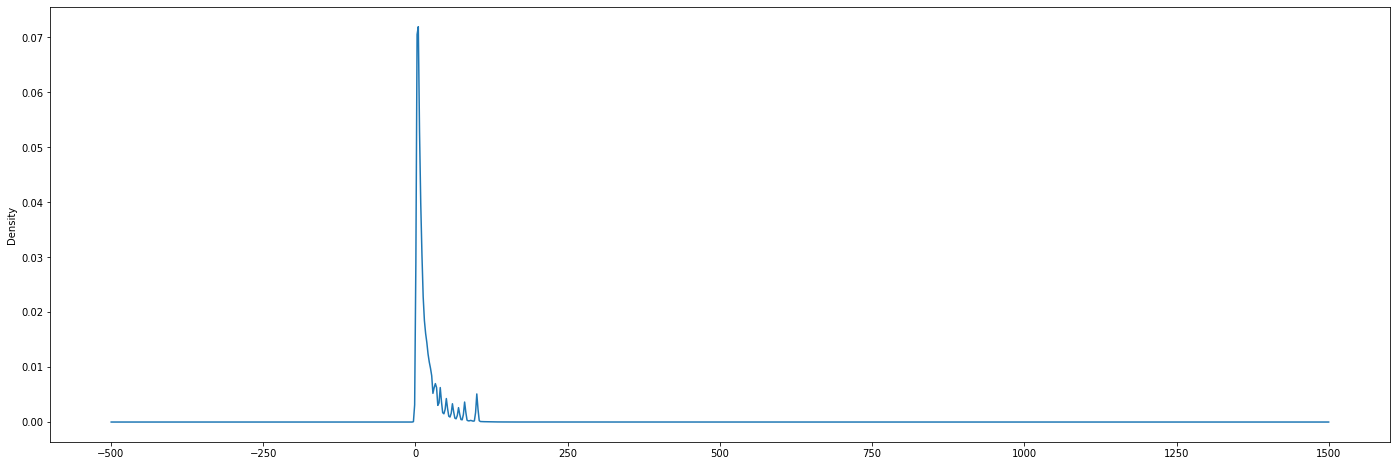

In [15]:

df_base['ft_sp'].plot(kind = 'density', figsize = (24,8))


In [16]:

"""
Your code has several areas where you use the DataFrame apply() method. 

This approach is flexible and can be used to apply any function to each element of a DataFrame or Series
    , but it is not the most efficient way to do so
    , particularly for larger datasets.

Whenever you're dealing with operations on pandas DataFrames, 
    it's generally a good idea to make use of vectorized operations instead of looping over the rows 
    (which is what apply() does under the hood). 
    This is because pandas is built on top of NumPy
        , and vectorized operations take advantage of this underlying structure to perform computations more efficiently.
"""



"\nYour code has several areas where you use the DataFrame apply() method. \n\nThis approach is flexible and can be used to apply any function to each element of a DataFrame or Series\n    , but it is not the most efficient way to do so\n    , particularly for larger datasets.\n\nWhenever you're dealing with operations on pandas DataFrames, \n    it's generally a good idea to make use of vectorized operations instead of looping over the rows \n    (which is what apply() does under the hood). \n    This is because pandas is built on top of NumPy\n        , and vectorized operations take advantage of this underlying structure to perform computations more efficiently.\n"

In [17]:



print(datetime.now())



2023-06-05 08:24:03.161368


### Adding Variables to help with Evaluation

In [18]:

# Top 3 Actuals
##

groupings = ['@id_RACE']

# Actual Result
#df_base['Winner_actual'] = df_base.apply(lambda x : 1 if int(x.position) ==1 else 0, axis = 1)
#df_base['Top3_actual'] = df_base.apply(lambda x : 1 if int(x.position) <=3 else 0, axis = 1)

# Calculating the variables using vectorised operation(s)
df_base['Winner_actual'] = (df_base['position'] == 1).astype(int)
df_base['Top3_actual'] = (df_base['position'] <= 3).astype(int)

print(datetime.now())


2023-06-05 08:24:04.348411


In [19]:

# Random Position 
##
groupings = ['@id_RACE']

import random
#print(random.uniform(0, 1))

df_base['rand_mean'] = 0.5
df_base['rand_uniform'] = np.random.normal( df_base['rand_mean'] )

## Rank from the random variables 
df_base["position_random"] = df_base.groupby(groupings)["rand_uniform"].rank("dense", ascending=False)

# Winner / Place Columns
#df_base['Winner_random'] = df_base.apply(lambda x : 1 if x.position_random <= 1 else 0, axis = 1)
#df_base['Top3_random'] = df_base.apply(lambda x : 1 if x.position_random <= 3 else 0, axis = 1)

# Replacing the apply statement with vectorised operations, are faster
df_base['Winner_random'] = (df_base['position_random'] <= 1).astype(int)
df_base['Top3_random'] = (df_base['position_random'] <= 3).astype(int)

print(datetime.now())


2023-06-05 08:24:04.609163


In [20]:

# FastTrack Position

groupings = ['@id_RACE']

print(datetime.now())

## Rank for Place Preds - FastTrack Position
df_base["position_fasttrack"] = df_base.groupby(groupings)["ft_sp"].rank("dense", ascending=True)

# Winner / Place Columns

#df_base['Winner_fastrack'] = df_base.apply(lambda x : 1 if x.position_fasttrack <= 1 else 0, axis = 1)
#df_base['Top3_fastrack'] = df_base.apply(lambda x : 1 if x.position_fasttrack <= 3 else 0, axis = 1)

# Replacing apply with vectorised operations
df_base['Winner_fastrack'] = (df_base['position_fasttrack'] <= 1).astype(int)
df_base['Top3_fastrack'] = (df_base['position_fasttrack'] <= 3).astype(int)

print(datetime.now())


2023-06-05 08:24:04.614362
2023-06-05 08:24:04.791882


In [21]:

# Random Benchmark

if DEBUG:
    print(datetime.now())

    # Bet on all Preds = s1
    df_base['rand_1_v0'] = df_base.apply( lambda x : 1 if x.position_random == 1 else 0, axis = 1 )
    df_base['h_rand_1_v0'] = df_base.apply( lambda x : 1 if ( x.rand_1_v0 == 1 ) & ( x.position == 1 ) \
                                                 else 0 if (x.rand_1_v0 == 1) & ( x.position > 1 )\
                                                 else 0, axis = 1 )
    df_base['p_rand_1_v0'] = df_base.apply( lambda x : x.ft_sp - 1 if ( x.rand_1_v0 == 1 ) & ( x.position == 1 ) \
                                                 else -1 if (x.rand_1_v0 == 1) & ( x.position > 1 )\
                                                 else 0, axis = 1 )

    print()
    print(datetime.now())

    # Bet on all Place to win = s2
    #df_base['fs_2'] = df_base.apply(lambda x : 1 if x.position_preds <= 3 else 0, axis = 1)
    df_base["rand_all_plc_v0"] = df_base.apply(lambda x : np.nan if pd.isna(x.position_random) \
                                                                    else 1 if (x.x_num_dogs >= 8) & (x.position_random <= 3) \
                                                                        else 1 if (x.x_num_dogs >= 5) & (x.position_random <= 2) \
                                                                            else 0 if (x.x_num_dogs < 5) \
                                                                                else 0, axis = 1)
    df_base['h_rand_all_plc_v0'] = df_base.apply( lambda x : 1 if ( x.rand_all_plc_v0 == 1 ) & ( x.position == 1 ) \
                                                 else 0 if ( x.rand_all_plc_v0 == 1 ) & ( x.position > 1 ) \
                                                 else 0 , axis = 1 )

    df_base['p_rand_all_plc_v0'] = df_base.apply( lambda x : x.ft_sp - 1 if ( x.rand_all_plc_v0 == 1 ) & ( x.position == 1 ) \
                                                 else -1 if ( x.rand_all_plc_v0 == 1 ) & ( x.position > 1 ) \
                                                 else 0 , axis = 1 )

    print()
    print(datetime.now())


    # Laying Last 
    df_base["rand_lay_last_v0"] = df_base.apply(lambda x : np.nan if pd.isna(x.position_random) \
                                                                    else 1 if (x.x_num_dogs == x.position_random) \
                                                                       else 0, axis = 1)

    df_base['h_rand_lay_last_v0'] = df_base.apply( lambda x : 1 if ( x.rand_lay_last_v0 == 1 ) & ( x.position > 1 ) \
                                                 else 0 , axis = 1 )

    df_base['p_rand_lay_last_v0'] = df_base.apply( lambda x : 1 if ( x.rand_lay_last_v0 == 1 ) & ( x.position > 1 ) \
                                                 else -x.ft_sp*5 if ( x.rand_lay_last_v0 == 1 ) & ( x.position == 1 ) \
                                                 else 0 , axis = 1 )

    print()
    print(datetime.now())

# 3 min runtime


In [22]:
# Vectorised code for the random benchmark

In [23]:

print(datetime.now())

# Random Benchmark
df_base['rand_1'] = (df_base['position_random'] == 1).astype(int)
df_base['h_rand_1'] = ((df_base['rand_1'] == 1) & (df_base['position'] == 1)).astype(int)

#df_base['p_rand_1'] = df_base['rand_1'].where( (df_base['position'] == 1) & (df_base['rand_1'] == 1), -1) * (df_base['ft_sp'] - 1)

p_rand_cond = [ (df_base['rand_1'] == 1) & (df_base['position'] == 1), (df_base['rand_1'] == 1) & (df_base['position'] > 1) ]
p_rand_choices = [ df_base['ft_sp'] - 1, -1 ]
df_base['p_rand_1'] = np.select(p_rand_cond, p_rand_choices, default=0)



print(datetime.now())

## Betting on All top 3 (or 2 if num dogs < 5) to win

#np.where(condition, value if true, value if false)
df_base["rand_all_plc_to_win"] = np.where( ((df_base['x_num_dogs'].isin([8]) ) & (df_base['position_random'] <= 3)) | ((df_base['x_num_dogs'].isin([5,6,7]) ) & (df_base['position_random'] <= 2)), 1, 0)
df_base['h_rand_all_plc_to_win'] = ((df_base['rand_all_plc_to_win'] == 1) & (df_base['position'] == 1)).astype(int)

rand_all_plc_to_win_cond = [ (df_base['rand_all_plc_to_win'] == 1) & (df_base['position'] == 1), (df_base['rand_all_plc_to_win'] == 1) & (df_base['position'] > 1) ]
rand_all_plc_to_win_choices = [ df_base['ft_sp'] - 1, -1 ]
df_base['p_rand_all_plc_to_win'] = np.select( rand_all_plc_to_win_cond, rand_all_plc_to_win_choices, default=0)



print(datetime.now())

## Betting on the last greyound to lay 
df_base["rand_lay_last"] = (df_base['x_num_dogs'] == df_base['position_random']).astype(int)
df_base['h_rand_lay_last'] = ((df_base['rand_lay_last'] == 1) & (df_base['position'] > 1)).astype(int)


#df_base['p_rand_lay_last'] = df_base['rand_lay_last'].where( (df_base['position'] > 1) & (df_base['rand_lay_last'] == 1), -df_base['ft_sp']*5)
rand_lay_last_conditions = [ (df_base['position'] > 1) & (df_base['rand_lay_last'] == 1), (df_base['position'] == 1) & (df_base['rand_lay_last'] == 1) ]
rand_lay_last_choices = [1, -df_base['ft_sp']*5]
df_base['p_rand_lay_last'] = np.select( rand_lay_last_conditions, rand_lay_last_choices, default=0)


print(datetime.now())


2023-06-05 08:24:04.824244
2023-06-05 08:24:04.839527
2023-06-05 08:24:04.868502
2023-06-05 08:24:04.884343


In [24]:

#QC the optimised code
if DEBUG:
    print(df_base['rand_1'].equals(df_base['rand_1_v0']))  # Will print False
    print(df_base['h_rand_1'].equals(df_base['h_rand_1_v0']))  # Will print False
    print(df_base['p_rand_1'].equals(df_base['p_rand_1_v0']))  

    print()
    print(df_base['rand_all_plc_v0'].equals(df_base['rand_all_plc_to_win']))  
    print(df_base['h_rand_all_plc_v0'].equals(df_base['h_rand_all_plc_to_win']))  
    print(df_base['p_rand_all_plc_v0'].equals(df_base['p_rand_all_plc_to_win']))  

    print()
    print(df_base['rand_lay_last_v0'].equals(df_base['rand_lay_last']))  
    print(df_base['h_rand_lay_last_v0'].equals(df_base['h_rand_lay_last']))  
    print(df_base['p_rand_lay_last_v0'].equals(df_base['p_rand_lay_last']))  



In [25]:
# Old FastTrack Benchmark code

In [26]:

# FastTrack Benchmark

if DEBUG:
    print()
    print(datetime.now())

    # Bet on all Preds = s1
    df_base['ft_1_v0'] = df_base.apply( lambda x : 1 if x.position_fasttrack == 1 else 0, axis = 1 )
    df_base['h_ft_1_v0'] = df_base.apply( lambda x : 1 if ( x.ft_1_v0 == 1 ) & ( x.position == 1 ) \
                                                 else 0 if ( x.ft_1_v0 == 1) & ( x.position > 1 )\
                                                 else 0, axis = 1 )
    df_base['p_ft_1_v0'] = df_base.apply( lambda x : x.ft_sp - 1 if ( x.ft_1_v0 == 1 ) & ( x.position == 1 ) \
                                                 else -1 if (x.ft_1_v0 == 1) & ( x.position > 1 )\
                                                 else 0, axis = 1 )

    print()
    print(datetime.now())

    # Bet on all Place = s2
    df_base["ft_all_plc_v0"] = df_base.apply(lambda x : np.nan if pd.isna(x.position_fasttrack) \
                                                                    else 1 if (x.x_num_dogs >= 8) & (x.position_fasttrack <= 3) \
                                                                        else 1 if (x.x_num_dogs >= 5) & (x.position_fasttrack <= 2) \
                                                                            else 0 if (x.x_num_dogs < 5) \
                                                                                else 0, axis = 1)
    df_base['h_ft_all_plc_v0'] = df_base.apply( lambda x : 1 if ( x.ft_all_plc_v0 == 1 ) & ( x.position == 1 ) \
                                                 else 0 if ( x.ft_all_plc_v0 == 1 ) & ( x.position > 1 ) \
                                                 else 0 , axis = 1 )

    df_base['p_ft_all_plc_v0'] = df_base.apply( lambda x : x.ft_sp - 1 if ( x.ft_all_plc_v0 == 1 ) & ( x.position == 1 ) \
                                                 else -1 if ( x.ft_all_plc_v0 == 1 ) & ( x.position > 1 ) \
                                                 else 0 , axis = 1 )

    print()
    print(datetime.now())

    # Laying Last 
    df_base["ft_lay_last_v0"] = df_base.apply(lambda x : np.nan if pd.isna(x.position_fasttrack) \
                                                                    else 1 if (x.x_num_dogs == x.position_fasttrack) \
                                                                       else 0, axis = 1)

    df_base['h_ft_lay_last_v0'] = df_base.apply( lambda x : 1 if ( x.ft_lay_last_v0 == 1 ) & ( x.position > 1) \
                                                 else 0 , axis = 1 )

    df_base['p_ft_lay_last_v0'] = df_base.apply( lambda x : 1 if ( x.ft_lay_last_v0 == 1 ) & ( x.position > 1 ) \
                                                 else -x.ft_sp*5 if ( x.ft_lay_last_v0 == 1 ) & ( x.position == 1 ) \
                                                 else 0 , axis = 1 )

    print()
    print(datetime.now())
    #3Min runtime


In [27]:
# Optimised fastrack benchmark code

In [28]:

# Bet on all Preds = s1
df_base['ft_1'] = (df_base.position_fasttrack == 1).astype(int)
df_base['h_ft_1'] = ((df_base.ft_1 == 1) & (df_base.position == 1)).astype(int)
df_base['p_ft_1'] = np.where((df_base.ft_1 == 1) & (df_base.position == 1), df_base.ft_sp - 1, 
                        np.where((df_base.ft_1 == 1) & (df_base.position > 1), -1, 0))

print()
print(datetime.now())

# Bet on all Place = s2
df_base["ft_all_plc"] = np.where(pd.isna(df_base.position_fasttrack), np.nan, 
                            np.where((df_base.x_num_dogs >= 8) & (df_base.position_fasttrack <= 3), 1, 
                                np.where((df_base.x_num_dogs >= 5) & (df_base.position_fasttrack <= 2), 1, 
                                    np.where(df_base.x_num_dogs < 5, 0, 0))))
df_base['h_ft_all_plc'] = ((df_base.ft_all_plc == 1) & (df_base.position == 1)).astype(int)
df_base['p_ft_all_plc'] = np.where((df_base.ft_all_plc == 1) & (df_base.position == 1), df_base.ft_sp - 1, 
                             np.where((df_base.ft_all_plc == 1) & (df_base.position > 1), -1, 0))

print()
print(datetime.now())

# Laying Last 
df_base["ft_lay_last"] = np.where(pd.isna(df_base.position_fasttrack), np.nan, 
                             np.where(df_base.x_num_dogs == df_base.position_fasttrack, 1, 0))

df_base['h_ft_lay_last'] = ((df_base.ft_lay_last == 1) & (df_base.position > 1)).astype(int)
df_base['p_ft_lay_last'] = np.where((df_base.ft_lay_last == 1) & (df_base.position > 1), 1, 
                              np.where((df_base.ft_lay_last == 1) & (df_base.position == 1), -df_base.ft_sp*5, 0))

print()
print(datetime.now())



2023-06-05 08:24:04.946900

2023-06-05 08:24:04.972040

2023-06-05 08:24:04.989236


In [29]:

#QC the optimised code
if DEBUG:
    print(df_base['ft_1_v0'].equals(df_base['ft_1']))
    print(df_base['h_ft_1_v0'].equals(df_base['h_ft_1']))
    print(df_base['p_ft_1_v0'].equals(df_base['p_ft_1']))
    print()

    print(df_base['ft_all_plc_v0'].astype(float).equals(df_base['ft_all_plc']))
    print(df_base['h_ft_all_plc_v0'].equals(df_base['h_ft_all_plc']))
    print(df_base['p_ft_all_plc_v0'].equals(df_base['p_ft_all_plc']))
    print()

    print(df_base['ft_lay_last_v0'].astype(float).equals(df_base['ft_lay_last']))
    print(df_base['h_ft_lay_last_v0'].equals(df_base['h_ft_lay_last']))
    print(df_base['p_ft_lay_last_v0'].equals(df_base['p_ft_lay_last']))
    print()


In [30]:

df_base.describe()


,@id_DOG,Box,Rug,Weight,Handicap,Margin1,Margin2,Checks,SplitMargin,y_runtime,Prizemoney,RaceId,TrainerId,@id_RACE,RaceNum,ft_sp,x_num_dogs,position,y_margin,y_pos,Winner_actual,Top3_actual,rand_mean,rand_uniform,position_random,Winner_random,Top3_random,position_fasttrack,Winner_fastrack,Top3_fastrack,rand_1,h_rand_1,p_rand_1,rand_all_plc_to_win,h_rand_all_plc_to_win,p_rand_all_plc_to_win,rand_lay_last,h_rand_lay_last,p_rand_lay_last,ft_1,h_ft_1,p_ft_1,ft_all_plc,h_ft_all_plc,p_ft_all_plc,ft_lay_last,h_ft_lay_last,p_ft_lay_last
count,7.250800e+05,725080.000000,725080.000000,725079.000000,0.0,725080.000000,624468.000000,725080.000000,605308.000000,725080.000000,498861.000000,7.250800e+05,725080.000000,7.250800e+05,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.0,725080.000000,725080.00000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000
mean,4.866356e+08,4.477743,4.584582,29.935174,NaN,6.483733,2.071076,0.426676,7.265410,24.363969,441.621810,7.640069e+08,111702.449377,7.640069e+08,6.173288,17.092809,7.347380,4.171696,6.396170,4.171696,0.138760,0.415892,0.5,0.498690,4.17369,0.138498,0.415493,4.033828,0.143678,0.433520,0.138498,0.019603,-0.032199,0.350124,0.048862,-0.079539,0.138498,0.118934,-0.416548,0.143678,0.058152,-0.020351,0.365327,0.100381,-0.060444,0.104107,0.102107,-0.204504
std,1.219313e+08,2.343451,2.431397,3.312836,NaN,8.260129,7.241565,1.439907,2.526565,4.941794,2912.322446,7.786416e+07,78747.029834,7.786416e+07,3.287968,21.284010,0.890034,2.163317,4.794569,2.163317,0.345696,0.492875,0.0,0.999065,2.16319,0.345422,0.492807,2.090421,0.350763,0.495561,0.345422,0.138633,1.203319,0.477009,0.215580,1.918257,0.345422,0.323712,8.555538,0.350763,0.234031,0.427231,0.481522,0.300507,0.959968,0.305400,0.302790,8.201987
min,1.083910e+08,1.000000,1.000000,18.700000,NaN,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,6.238619e+08,6418.000000,6.238619e+08,1.000000,0.260000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.5,-4.007856,1.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-4999.950000,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-709.500000
25%,4.159944e+08,2.000000,2.000000,27.200000,NaN,2.530000,0.570000,0.000000,5.500000,20.520000,0.000000,6.985139e+08,65438.000000,6.985139e+08,3.000000,4.200000,7.000000,2.000000,2.530000,2.000000,0.000000,0.000000,0.5,-0.176363,2.00000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
50%,4.791464e+08,4.000000,4.000000,29.900000,NaN,5.500000,1.410000,0.000000,6.780000,23.490000,65.000000,7.654781e+08,99808.000000,7.654781e+08,6.000000,8.700000,8.000000,4.000000,5.500000,4.000000,0.000000,0.000000,0.5,0.497742,4.00000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.620734e+08,7.000000,7.000000,32.500000,NaN,9.140000,2.700000,0.000000,8.750000,26.990000,425.000000,8.292900e+08,125087.000000,8.292900e+08,9.000000,21.000000,8.000000,6.000000,9.140000,6.000000,0.000000,1.000000,0.5,1.174129,6.00000,0.000000,1.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.145360e+09,8.000000,10.000000,55.000000,NaN,5229.500000,5100.140000,25.000000,30.660000,396.120000,1000000.000

In [37]:

display(pd.DataFrame(df_base.isna().sum()))


,0
@id_DOG,0
Place,0
DogName,0
Box,0
Rug,0
...,...
h_ft_all_plc,0
p_ft_all_plc,0
ft_lay_last,0
h_ft_lay_last,0


In [39]:

df_base.agg({'TrainerName':'nunique', 'Track':'nunique', 'DogName':'nunique'})


TrainerName     3703
Track             58
DogName        30537
dtype: int64

In [40]:
pd.set_option('display.max_rows', 50)

In [41]:

# Some Track based EDA
tracks_unq = df_base.Track.unique().tolist()

print(type(tracks_unq))

tracks_unq.sort()

print(tracks_unq)


<class 'list'>
['Albion Park', 'Angle Park', 'Ballarat', 'Bathurst', 'Bendigo', 'Broken Hill', 'Bulli', 'Bundaberg', 'Cannington', 'Capalaba', 'Casino', 'Coonamble', 'Cranbourne', 'Dapto', 'Darwin', 'Devonport', 'Dubbo', 'Gawler', 'Geelong', 'Gosford', 'Goulburn', 'Grafton', 'Gunnedah', 'Healesville', 'Hobart', 'Horsham', 'Ipswich', 'Kempsey', 'Launceston', 'Lismore', 'Lithgow', 'Maitland', 'Mandurah', 'Meadows', 'Moree', 'Mount Gambier', 'Murray Bridge', 'Muswellbrook', 'Northam', 'Nowra', 'Potts Park', 'Richmond', 'Rockhampton', 'Sale', 'Sandown Park', 'Shepparton', 'Tamworth', 'Taree', 'Temora', 'The Gardens', 'Townsville', 'Traralgon', 'Wagga', 'Warragul', 'Warrnambool', 'Wauchope', 'Wentworth Park', 'Young']


In [42]:

print(datetime.now().date())


2023-06-05


In [45]:

print(df_base.position.value_counts())


1    100612
2    100492
3    100451
4    100408
5    100364
6     93823
7     75966
8     52964
Name: position, dtype: int64


In [46]:

print(df_base.columns.values.tolist())


['@id_DOG', 'Place', 'DogName', 'Box', 'Rug', 'Weight', 'StartPrice', 'Handicap', 'Margin1', 'Margin2', 'PIR', 'Checks', 'Comments', 'SplitMargin', 'y_runtime', 'Prizemoney', 'RaceId', 'TrainerId', 'TrainerName', '@id_RACE', 'RaceNum', 'RaceName', 'RaceTime', 'Distance', 'RaceGrade', 'Track', 'date', 'Event_Dt', 'ft_sp', 'x_num_dogs', 'position', 'y_margin', 'y_pos', 'Winner_actual', 'Top3_actual', 'rand_mean', 'rand_uniform', 'position_random', 'Winner_random', 'Top3_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack', 'rand_1', 'h_rand_1', 'p_rand_1', 'rand_all_plc_to_win', 'h_rand_all_plc_to_win', 'p_rand_all_plc_to_win', 'rand_lay_last', 'h_rand_lay_last', 'p_rand_lay_last', 'ft_1', 'h_ft_1', 'p_ft_1', 'ft_all_plc', 'h_ft_all_plc', 'p_ft_all_plc', 'ft_lay_last', 'h_ft_lay_last', 'p_ft_lay_last']


1    100612
2    100492
3    100451
4    100408
5    100364
6     93823
7     75966
8     52964
Name: position, dtype: int64


In [47]:

#keep_cols_for_export = ['@id_DOG', 'DogName', '@id_RACE','RaceName','Track','RaceGrade','Distance','TrainerName','RunTime','Place','x_races_tot']

# 'TrainerName', 'Track' have been dummified
#cols_to_keep = ['@id_DOG', 'DogName', 'y_runtime', 'RaceId', '@id_RACE', 'position', 'ft_sp', 'x_num_dogs', 'Top3_actual', 'position_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack', 'Winner_actual', 'Winner_random', 'Top3_random', 'RaceGrade', 'Track']

"""
cols_for_drop = [ 'Place', 'Box', 'Rug', 'Weight', 'StartPrice', 'Handicap', 'Margin1', 'Margin2', 'PIR', 'Checks', 'Comments', 'SplitMargin' \
                 , 'Prizemoney', 'TrainerId', 'TrainerName', 'RaceNum', 'RaceName', 'RaceTime', 'date' ]
"""

cols_to_keep = ['@id_DOG', 'DogName', 'y_runtime', 'RaceId', '@id_RACE', 'Distance', 'RaceGrade', 'Track', 'Event_Dt', 'Prizemoney', 'TrainerId', 'TrainerName'\
                , 'ft_sp', 'x_num_dogs', 'position', 'y_margin', 'y_pos'\
                , 'Winner_actual', 'Top3_actual', 'rand_mean', 'rand_uniform', 'position_random', 'Winner_random', 'Top3_random'\
                , 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack'\
                , 'rand_1', 'h_rand_1', 'p_rand_1'\
                , 'rand_all_plc_to_win', 'h_rand_all_plc_to_win', 'p_rand_all_plc_to_win'\
                , 'rand_lay_last', 'h_rand_lay_last', 'p_rand_lay_last'\
                , 'ft_1', 'h_ft_1', 'p_ft_1'\
                , 'ft_all_plc', 'h_ft_all_plc', 'p_ft_all_plc'\
                , 'ft_lay_last', 'h_ft_lay_last', 'p_ft_lay_last']

#'Event_Dt', 

todaydt = datetime.now().date()
exp_fname = f'dataset_base_{todaydt}.csv'

#exp_ds = df_base.drop( columns = cols_for_drop ).rename( columns = { 'RunTime' : 'y_runtime' } )
exp_ds = df_base[cols_to_keep].rename( columns = { 'RunTime' : 'y_runtime' } )



In [48]:

print(exp_ds.shape)


(725080, 45)


In [49]:

print(exp_ds.columns.values.tolist())


['@id_DOG', 'DogName', 'y_runtime', 'RaceId', '@id_RACE', 'Distance', 'RaceGrade', 'Track', 'Event_Dt', 'Prizemoney', 'TrainerId', 'TrainerName', 'ft_sp', 'x_num_dogs', 'position', 'y_margin', 'y_pos', 'Winner_actual', 'Top3_actual', 'rand_mean', 'rand_uniform', 'position_random', 'Winner_random', 'Top3_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack', 'rand_1', 'h_rand_1', 'p_rand_1', 'rand_all_plc_to_win', 'h_rand_all_plc_to_win', 'p_rand_all_plc_to_win', 'rand_lay_last', 'h_rand_lay_last', 'p_rand_lay_last', 'ft_1', 'h_ft_1', 'p_ft_1', 'ft_all_plc', 'h_ft_all_plc', 'p_ft_all_plc', 'ft_lay_last', 'h_ft_lay_last', 'p_ft_lay_last']


In [50]:

exp_ds.head()


,@id_DOG,DogName,y_runtime,RaceId,@id_RACE,Distance,RaceGrade,Track,Event_Dt,Prizemoney,TrainerId,TrainerName,ft_sp,x_num_dogs,position,y_margin,y_pos,Winner_actual,Top3_actual,rand_mean,rand_uniform,position_random,Winner_random,Top3_random,position_fasttrack,Winner_fastrack,Top3_fastrack,rand_1,h_rand_1,p_rand_1,rand_all_plc_to_win,h_rand_all_plc_to_win,p_rand_all_plc_to_win,rand_lay_last,h_rand_lay_last,p_rand_lay_last,ft_1,h_ft_1,p_ft_1,ft_all_plc,h_ft_all_plc,p_ft_all_plc,ft_lay_last,h_ft_lay_last,p_ft_lay_last
0,108390981,DOLLY DOES IT,26.43,626271182,626271182,452m,Mixed 4/5,Devonport,2021-01-05,80.0,92892,M Elphinstone,11.0,8,4,6.00,4,0,0,0.5,0.761335,2.0,0,1,5.0,0,0,0,0,0.0,1,0,-1.0,0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,0,0.0
1,108390981,DOLLY DOES IT,26.40,629797242,629797242,452m,Grade 5,Devonport,2021-01-12,0.0,92892,M Elphinstone,7.0,7,5,6.00,5,0,0,0.5,1.958731,1.0,1,1,5.0,0,0,1,0,-1.0,1,0,-1.0,0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,0,0.0
2,108390981,DOLLY DOES IT,26.20,629797513,629797513,452m,Grade 5,Devonport,2021-01-19,1890.0,92892,M Elphinstone,7.0,7,1,5.25,1,1,1,0.5,0.906223,3.0,0,1,4.0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,0,0.0
3,108390981,DOLLY DOES IT,26.48,638810808,638810808,452m,Mixed 4/5 Heat,Devonport,2021-02-16,0.0,92892,M Elphinstone,7.0,8,7,10.50,7,0,0,0.5,0.712048,3.0,0,1,4.0,0,0,0,0,0.0,1,0,-1.0,0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,0,0.0
4,108390981,DOLLY DOES IT,26.91,643554706,643554706,452m,Grade 4,Devonport,2021-03-02,0.0,92892,M Elphinstone,91.0,8,8,18.50,8,0,0,0.5,-0.423623,8.0,0,0,8.0,0,0,0,0,0.0,0,0,0.0,1,1,1.0,0,0,0.0,0.0,0,0.0,1.0,1,1.0


In [51]:

exp_ds.describe()


,@id_DOG,y_runtime,RaceId,@id_RACE,Prizemoney,TrainerId,ft_sp,x_num_dogs,position,y_margin,y_pos,Winner_actual,Top3_actual,rand_mean,rand_uniform,position_random,Winner_random,Top3_random,position_fasttrack,Winner_fastrack,Top3_fastrack,rand_1,h_rand_1,p_rand_1,rand_all_plc_to_win,h_rand_all_plc_to_win,p_rand_all_plc_to_win,rand_lay_last,h_rand_lay_last,p_rand_lay_last,ft_1,h_ft_1,p_ft_1,ft_all_plc,h_ft_all_plc,p_ft_all_plc,ft_lay_last,h_ft_lay_last,p_ft_lay_last
count,7.250800e+05,725080.000000,7.250800e+05,7.250800e+05,498861.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.0,725080.000000,725080.00000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000
mean,4.866356e+08,24.363969,7.640069e+08,7.640069e+08,441.621810,111702.449377,17.092809,7.347380,4.171696,6.396170,4.171696,0.138760,0.415892,0.5,0.498690,4.17369,0.138498,0.415493,4.033828,0.143678,0.433520,0.138498,0.019603,-0.032199,0.350124,0.048862,-0.079539,0.138498,0.118934,-0.416548,0.143678,0.058152,-0.020351,0.365327,0.100381,-0.060444,0.104107,0.102107,-0.204504
std,1.219313e+08,4.941794,7.786416e+07,7.786416e+07,2912.322446,78747.029834,21.284010,0.890034,2.163317,4.794569,2.163317,0.345696,0.492875,0.0,0.999065,2.16319,0.345422,0.492807,2.090421,0.350763,0.495561,0.345422,0.138633,1.203319,0.477009,0.215580,1.918257,0.345422,0.323712,8.555538,0.350763,0.234031,0.427231,0.481522,0.300507,0.959968,0.305400,0.302790,8.201987
min,1.083910e+08,10.000000,6.238619e+08,6.238619e+08,0.000000,6418.000000,0.260000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.5,-4.007856,1.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-4999.950000,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-709.500000
25%,4.159944e+08,20.520000,6.985139e+08,6.985139e+08,0.000000,65438.000000,4.200000,7.000000,2.000000,2.530000,2.000000,0.000000,0.000000,0.5,-0.176363,2.00000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
50%,4.791464e+08,23.490000,7.654781e+08,7.654781e+08,65.000000,99808.000000,8.700000,8.000000,4.000000,5.500000,4.000000,0.000000,0.000000,0.5,0.497742,4.00000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.620734e+08,26.990000,8.292900e+08,8.292900e+08,425.000000,125087.000000,21.000000,8.000000,6.000000,9.140000,6.000000,0.000000,1.000000,0.5,1.174129,6.00000,0.000000,1.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.145360e+09,396.120000,8.978632e+08,8.978632e+08,1000000.000000,337600.000000,999.990000,8.000000,8.000000,27.000000,8.000000,1.000000,1.000000,0.5,5.849899,8.00000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.500000,1.000000,1.000000,33.140000,1.000000,1.000000,1.000000


In [52]:
print(datetime.now())

2023-06-05 08:27:01.948067


In [53]:

exp_ds.to_csv(f'{fileloc}/{exp_fname}', index = False)


In [54]:

print(datetime.now())
print()
print('THE END')


2023-06-05 08:28:08.662559

THE END


In [ ]:

# 3 Minute Export Time 
# 1 Minute Export Time @ 5 June 
